**Exercise 2: Logistic Regression**

In [1075]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

Read the data, plot it to visualize

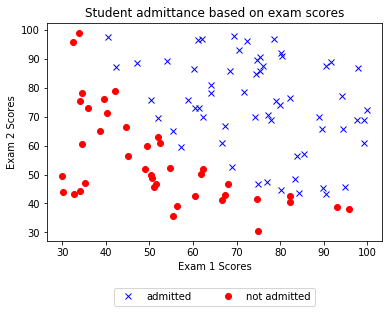

In [1076]:
f = open('ex2data1.txt')
lines =  np.array([map(float, x.strip().split(',')) for x in f.read().strip().split('\n')])
b0 = lines[:,2] == 0
b1 = lines[:,2] == 1

# Separate into values with y = 0 (neg) & y = 1 (pos)
pos = np.delete(lines[b1], 2, axis=1)
neg = np.delete(lines[b0], 2, axis=1)

#Plot the data

def draw_raw_data():
    plt.title('Student admittance based on exam scores')
    plt.plot(pos[:, 0], pos[:, 1], 'bx', label='admitted')
    plt.plot(neg[:, 0], neg[:, 1], 'ro', label='not admitted')
    plt.xlabel('Exam 1 Scores')
    plt.ylabel('Exam 2 Scores')
    plt.legend(bbox_to_anchor=(.2, -.3, .6, -.3), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
    
draw_raw_data()
plt.show()

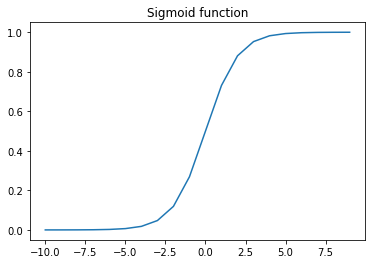

In [1077]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

test = np.arange(-10, 10)
plt.title('Sigmoid function')
plt.plot(test, sigmoid(test))
plt.show()

Define Cost and gradient functions

In [1078]:
def cost(thetas, x, y):
    h = sigmoid(x.dot(thetas))
    m = float(x.shape[0])
    p1 = - y.T.dot(np.log(h))
    p2 = - (1 - y).T.dot(np.log(1 - h))
    ans = (1/(m)) * (p1 + p2)
    
    try:
        ans = ans[0][0]
    except:
        ans = ans[0]
    
    if np.isnan(ans):
        return np.inf
    else:
        return ans

def grad(thetas, x, y):
    h = sigmoid(x.dot(thetas)).reshape(x.shape[0], 1)
    m = float(x.shape[0])
    ans = (1/m) * (h - y).T.dot(x)
    return ans.flatten()

Get initial cost and gradient, then minimize theta values

In [1079]:
x = np.delete(lines, 2, axis=1)
y = np.delete(lines, [0, 1], axis=1)
m, n = x.shape

X = np.append(np.ones((m, 1)), x, 1)
thetas = np.zeros((n+1, 1))

# Get the initial cost
print 'Initial Cost is ', (cost(thetas, X, y))
print 'Gradient is', grad(thetas, X, y)

# Thetas minimized
get_min = optimize.minimize(cost, thetas, options={"maxiter":1500}, jac=grad, args=(X, y), method=None)
thetasopt = get_min.x

print 'Optimal thetas', thetasopt

Initial Cost is  0.69314718056
Gradient is [ -0.1        -12.00921659 -11.26284221]
Optimal thetas [-25.16131634   0.2062316    0.20147143]


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


Plot the decision boundary

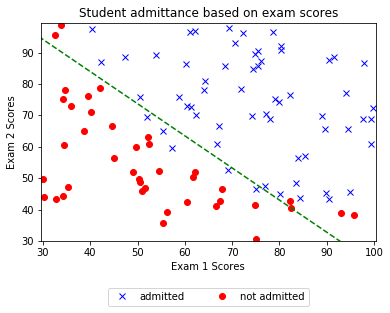

In [1080]:
def draw_boundary():
    draw_raw_data()
    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))

    Xaxis = np.arange(0, 100)
    Y = -(thetasopt[0] + Xaxis*thetasopt[1])/(thetasopt[2])

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.plot(Y, 'g--')
    
draw_boundary()
plt.show()

Prediction function - calculates sigmoid and returns percentage of confidence

In [1081]:
def predict(X):
    XX = np.array(X).reshape(len(X), 1).T
    m = XX.shape[0]
    
    xx = np.append(np.ones((1, 1)), XX, 1)
    return sigmoid(xx.dot(thetasopt))[0]

Predict and plot

Predicting 0.157369702904
Has passed


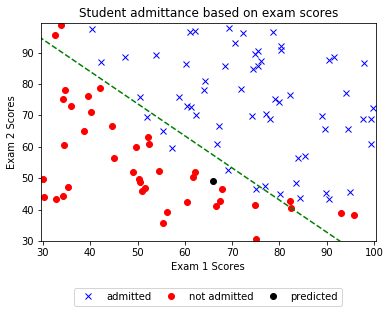

In [1082]:
prediction = predict([66, 49])
print 'Predicting', prediction

if prediction > 0:
    print 'Has passed'
else:
    print 'Has failed'

x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))

plt.title('Student admittance based on exam scores')
plt.plot(pos[:, 0], pos[:, 1], 'bx', label='admitted')
plt.plot(neg[:, 0], neg[:, 1], 'ro', label='not admitted')
plt.xlabel('Exam 1 Scores')
plt.ylabel('Exam 2 Scores')
    
Xaxis = np.arange(0, 100)
Y = -(thetasopt[0] + Xaxis*thetasopt[1])/(thetasopt[2])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.plot(Y, 'g--')
plt.plot(66, 49, 'ko', label='predicted')

plt.legend(bbox_to_anchor=(.1, -.3, .8, -.3), loc=3,
               ncol=3, mode="expand", borderaxespad=0.)
plt.show()